## Sprint I - Visualización

SPRINT 2 - 9 DE FEBRERO

In [1]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
plt.rcParams["figure.figsize"] = (10,8)
warnings.filterwarnings("ignore")

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../datos/bikes_clean.csv", index_col = 0)

In [3]:
df.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,
1,winter,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,winter,0,2,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,4
3,winter,0,3,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,4
4,spring,0,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,7
5,spring,0,5,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2


## Correlación

In [4]:
lista_columnas = ["temp", "atemp", "hum", "windspeed"]

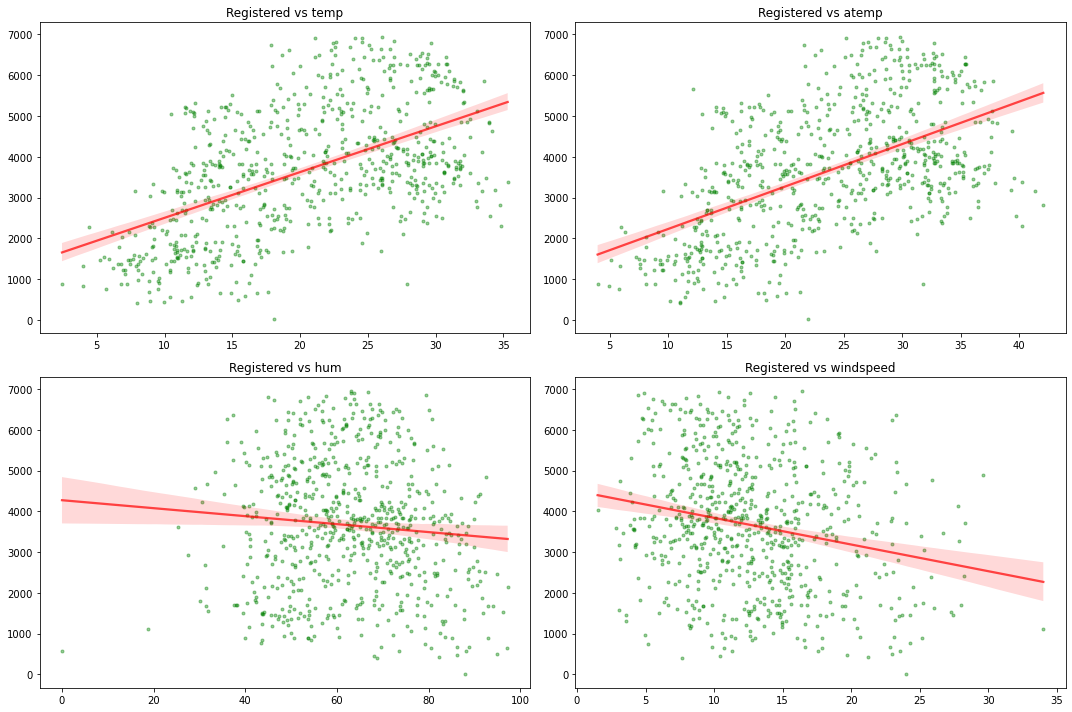

In [5]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
axes = axes.flat

for i, colum in enumerate(lista_columnas):
    sns.regplot(
        x = df[colum],
        y = df["registered"],
        color = "green",
        marker = ".",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "red", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Registered vs {colum}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.tight_layout();

- Vemos que las variables que más influyen a nuestra v. respuesta son el viento, la sensación térmica, la temperatura y la humedad.
- Obviamente registered y cnt están muy relacionadas

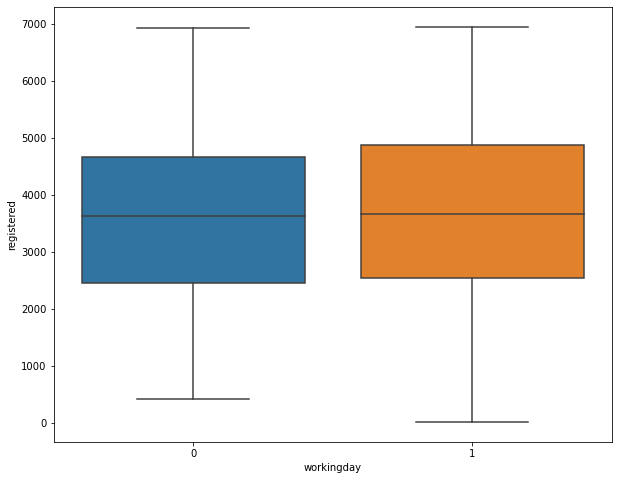

In [6]:
sns.boxplot(y= "registered", x="workingday", data = df) ;

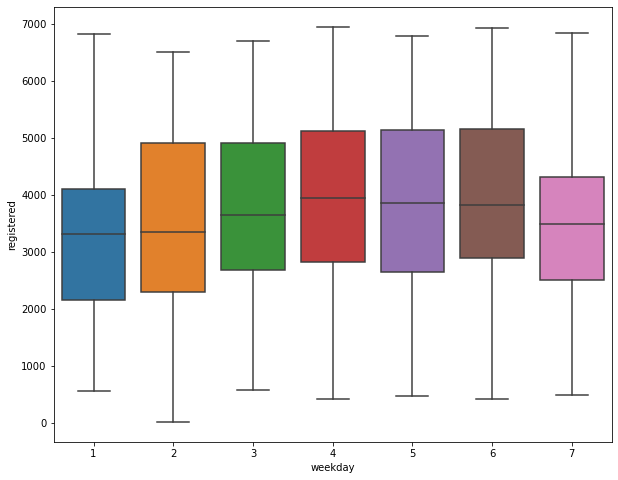

In [7]:
sns.boxplot(y= "registered", x="weekday", data = df) ;

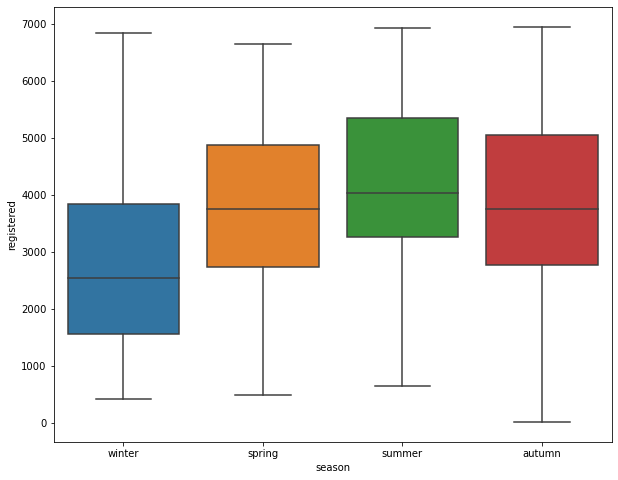

In [46]:
sns.boxplot(y= "registered", x="season", data = df) ;

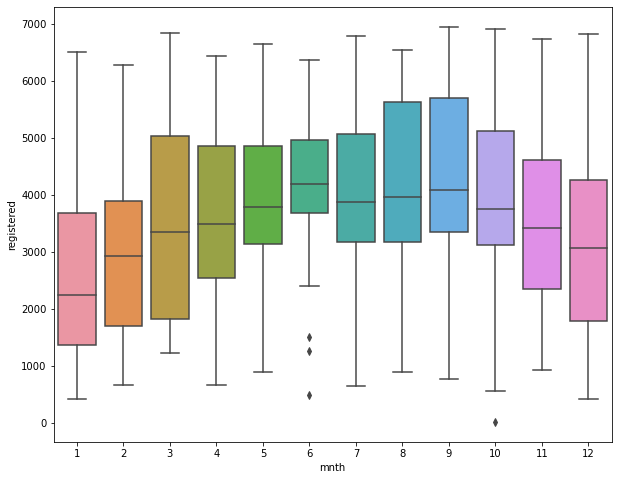

In [47]:
sns.boxplot(y= "registered", x="mnth", data = df) ;

- Para nuestro modelo nos quedaremos con las columnas: season, temperatura, sensación térmica, humedad y velocidad del viento.
- Variable respuesta: registered

In [48]:
df2 = df.copy()

In [49]:
df.drop(columns=["casual", "cnt"], inplace=True, axis=1)

In [50]:
df.to_csv("../datos/bikes_registered.csv")

In [51]:
df2.drop(columns=["registered", "cnt"], inplace=True, axis=1)

In [52]:
df2.to_csv("../datos/bikes_casual.csv")